# CREDIT CARD FRAUD DETECTION


In [1]:
#Import the Dependencies
from sklearn.pipeline import Pipeline
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import seaborn as sns
from sklearn import preprocessing
from scipy.stats import norm
import statistics


In [2]:
fp=pd.read_csv('creditcard.csv')

In [3]:
fp.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [4]:
fp.shape

(284807, 31)

In [5]:
fp.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.473120e-16  8.042109e-16  5.282512e-16  4.456271e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   1.426896e-15  1.701640e-15 -3.662252e-16 -1.217809e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [6]:
fp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
fp['Time'].dtype

dtype('float64')

In [8]:
fp.groupby('Time').mean()

V1         V2        V3        V4        V5        V6  \
Time                                                                     
0.0       -0.083975   0.096685  1.351413  0.913155 -0.139152  0.190013   
1.0       -1.162313  -0.762695  1.783101 -0.241756 -0.256754  1.523851   
2.0       -0.792099   0.919130  1.344914  0.117391  0.006897  0.033097   
4.0        1.229658   0.141004  0.045371  1.202613  0.191881  0.272708   
7.0       -0.769278   0.852060  0.480594 -0.381863  1.809266  2.074968   
...             ...        ...       ...       ...       ...       ...   
172785.0   0.120316   0.931005 -0.546012 -0.745097  1.130314 -0.235973   
172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
172788.0   0.839562   0.114614 -1.273565  0.065986  1.126277  1.827484   
172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

                V7        V8        V9       V10  ...       V21       V22  \
Time                                              ...                       
0.0       0.080398  0.091900  0.054181 -0.038090  ... -0.122041 -0.180417   
1.0       0.514535  0.312556 -1.450839  0.076345  ...  0.069849  0.388476   
2.0       0.534571 -0.005109  0.124534  0.190834  ... -0.108842  0.119227   
4.0      -0.005159  0.081213  0.464960 -0.099254  ... -0.167716 -0.270710   
7.0       0.745388 -1.478390  0.111664  0.419473  ...  0.935020 -0.641773   
...            ...       ...       ...       ...  ...       ...       ...   
172785.0  0.812722  0.115093 -0.204064 -0.657422  ... -0.314205 -0.808520   
172786.0 -4.918215  7.305334  1.914428  4.356170  ...  0.213454  0.111864   
172787.0  0.024330  0.294869  0.584800 -0.975926  ...  0.214205  0.924384   
172788.0 -0.491503  0.693781  0.412270 -0.441954  ...  0.248645  0.689139   
172792.0  1.577006 -0.414650  0.486180 -0.915427  ...  0.261057  0.643078   

               V23       V24       V25       V26       V27       V28   Amount  \
Time                                                                            
0.0      -0.004593 -0.136459  0.147855 -0.031610  0.062288 -0.003164   76.155   
1.0       0.359546 -0.932428  0.159867 -0.180513  0.003685  0.000853  251.080   
2.0      -0.081928 -0.115080 -0.219402  0.304104  0.236633  0.148117   36.830   
4.0      -0.154104 -0.780055  0.750137 -0.257237  0.034507  0.005168    4.990   
7.0      -0.073365  0.180941 -0.021031 -0.217896 -0.597587 -0.471467   67.000   
...            ...       ...       ...       ...       ...       ...      ...   
172785.0  0.050343  0.102800 -0.435870  0.124079  0.217940  0.068803    2.690   
172786.0  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.770   
172787.0  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.790   
172788.0 -0.100399  0.381670 -0.151707  0.229649  0.056638  0.038986   38.940   
172792.0  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.000   

          Class  
Time             
0.0         0.0  
1.0         0.0  
2.0         0.0  
4.0         0.0  
7.0         0.0  
...         ...  
172785.0    0.0  
172786.0    0.0  
172787.0    0.0  
172788.0    0.0  
172792.0    0.0  

[124592 rows x 30 columns]

In [9]:
fp['Time'].value_counts()

163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
127750.0     1
62260.0      1
62259.0      1
127753.0     1
172792.0     1
Name: Time, Length: 124592, dtype: int64

In [10]:
fp['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [11]:
fp.groupby('Class').value_counts()

Class  Time      V1          V2        V3          V4          V5         V6         V7          V8         V9         V10         V11        V12         V13        V14         V15        V16         V17         V18        V19        V20        V21        V22        V23        V24        V25        V26        V27        V28        Amount
0      163152.0  -1.196037   1.585949   2.883976    3.378471    1.511706   3.717077   0.585362   -0.156001   0.122648   4.217934    1.385525  -0.709405   -0.256168  -1.564352    1.693218  -0.785210   -0.228008   -0.412833   0.234834   1.375790  -0.370294   0.524395  -0.355170  -0.869790  -0.133198   0.327804  -0.035702  -0.858197  7.56      18
                 -1.203617   1.574009   2.889277    3.381404    1.538663   3.698747   0.560211   -0.150911   0.124136   4.220998    1.384569  -0.706897   -0.256274  -1.562583    1.692915  -0.787338   -0.226776   -0.412354   0.234322   1.385597  -0.366727   0.522223  -0.357329  -0.870174  -0.134166   0.327019  -0.

In [12]:
fp.groupby('Class').count()

Time      V1      V2      V3      V4      V5      V6      V7      V8  \
Class                                                                           
0      284315  284315  284315  284315  284315  284315  284315  284315  284315   
1         492     492     492     492     492     492     492     492     492   

           V9  ...     V20     V21     V22     V23     V24     V25     V26  \
Class          ...                                                           
0      284315  ...  284315  284315  284315  284315  284315  284315  284315   
1         492  ...     492     492     492     492     492     492     492   

          V27     V28  Amount  
Class                          
0      284315  284315  284315  
1         492     492     492  

[2 rows x 30 columns]

In [13]:
fp.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [14]:
fp.duplicated().sum()

1081

In [15]:
fp.drop_duplicates(inplace=True)

In [16]:
fp.duplicated().sum()

0

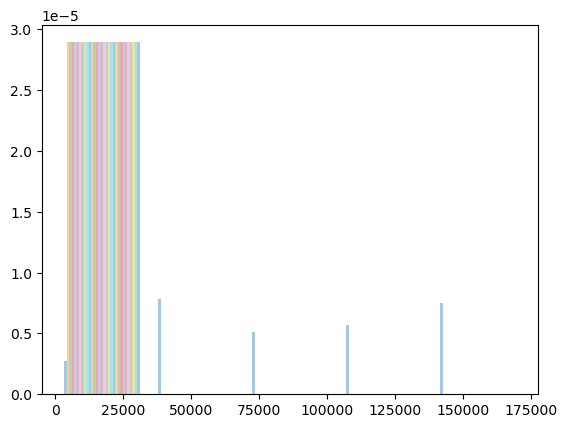

In [17]:
# Plotting the histogram.
plt.hist(fp, bins=5, density=True, alpha=0.4)
  
plt.show()

/Users/pritikumari/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


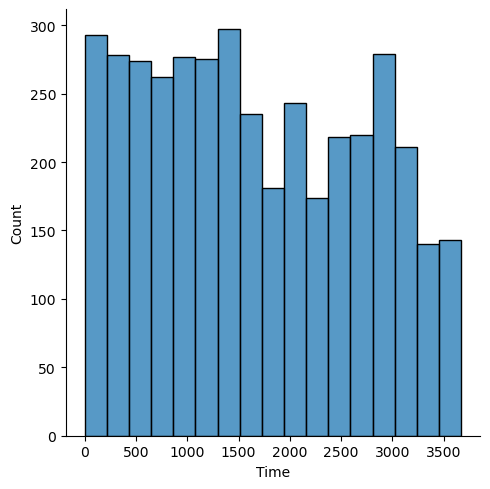

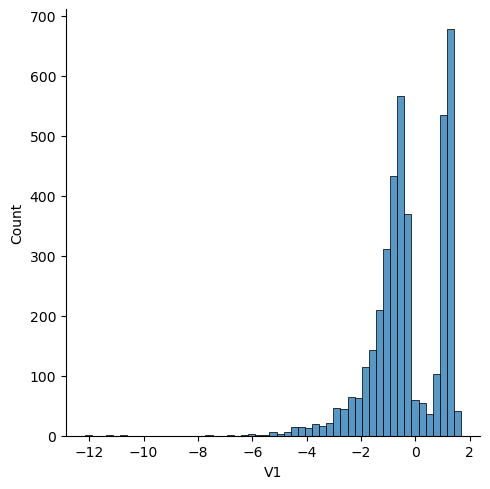

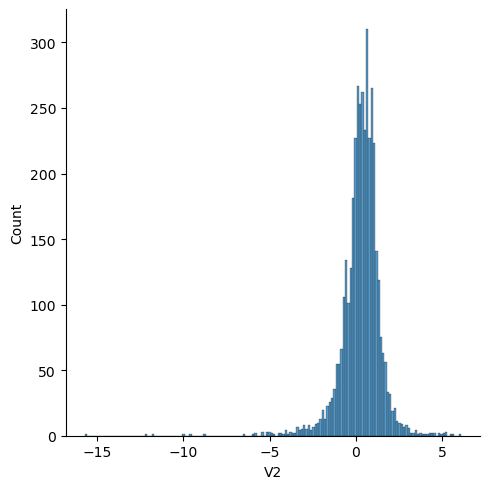

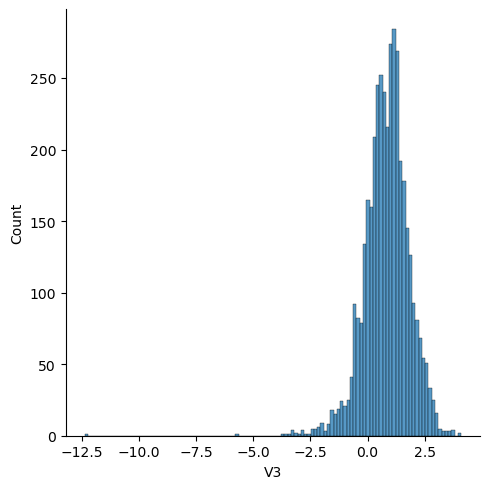

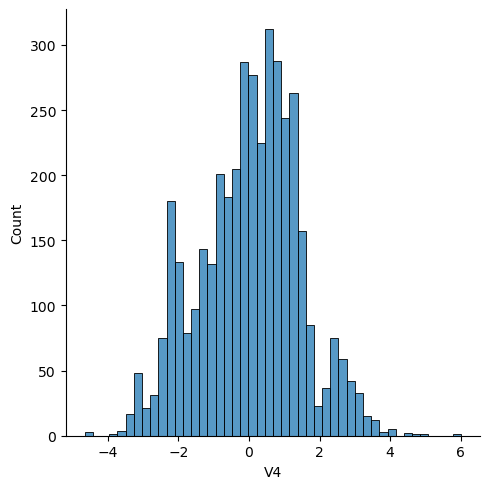

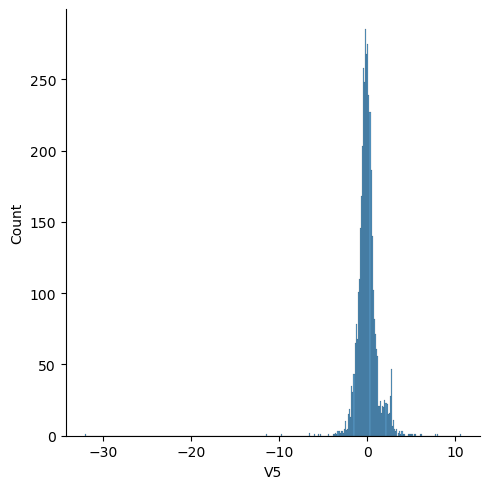

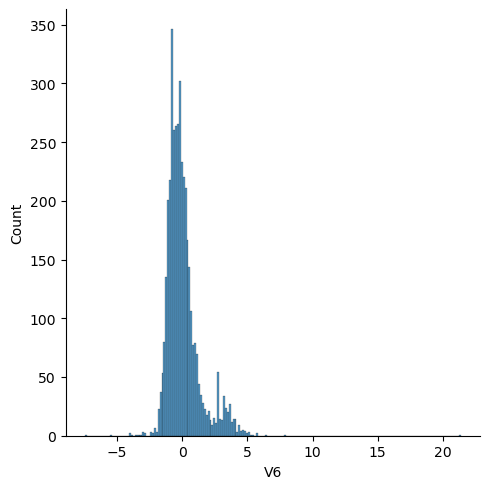

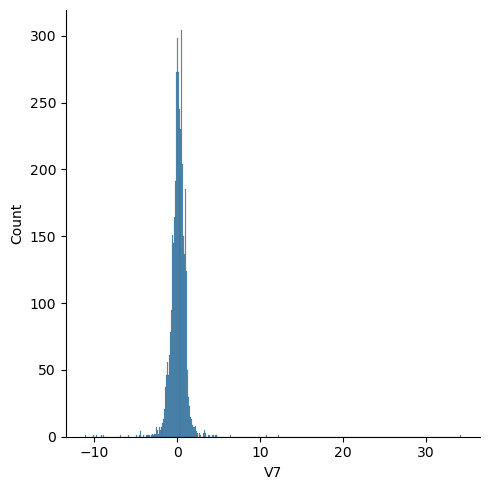

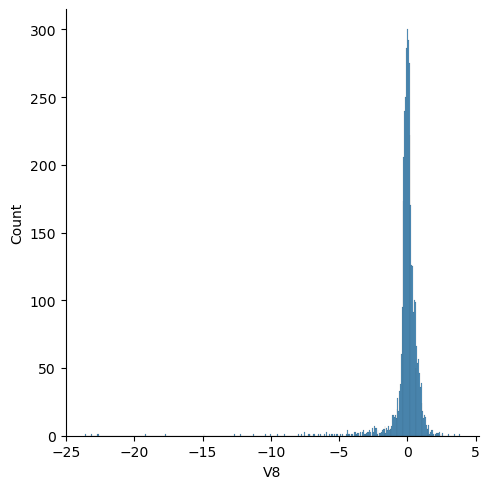

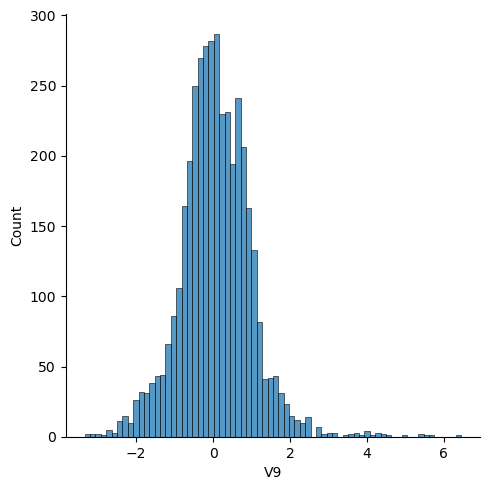

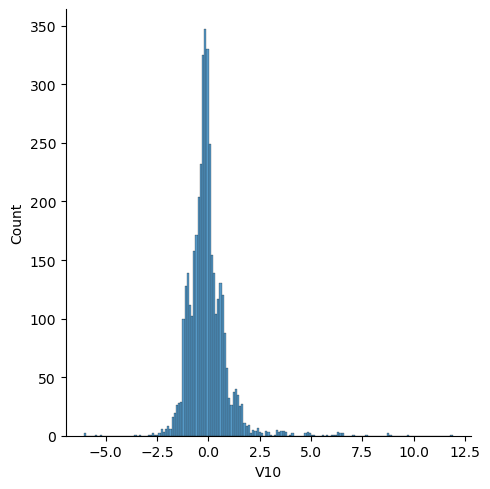

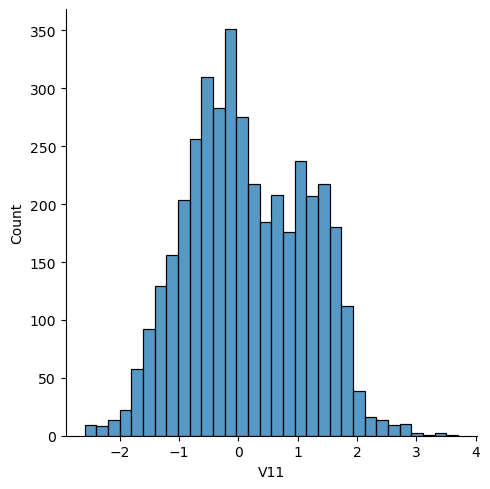

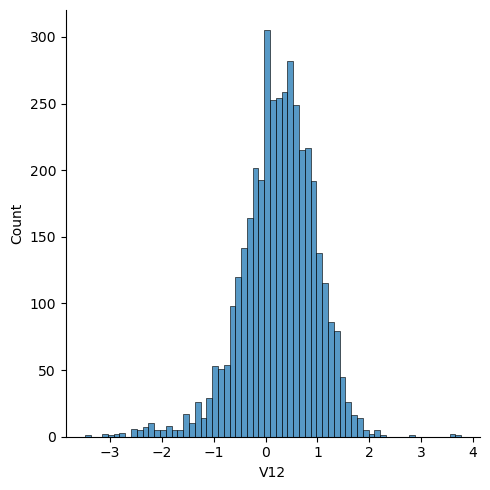

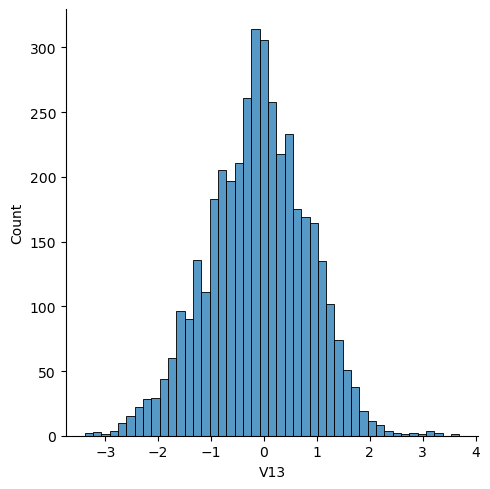

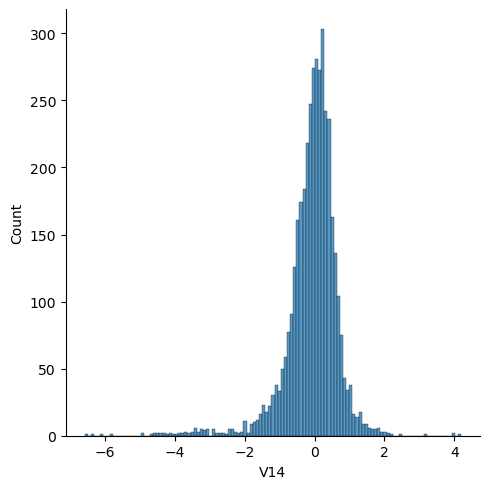

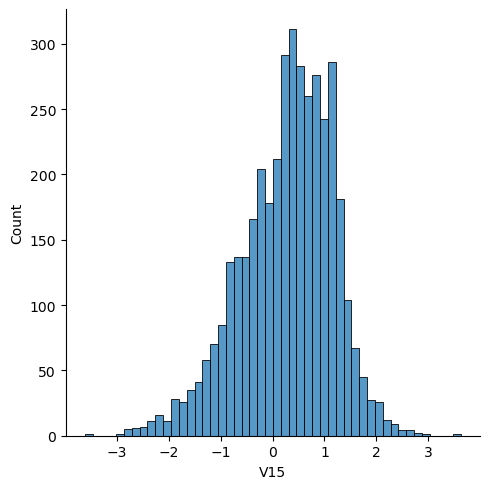

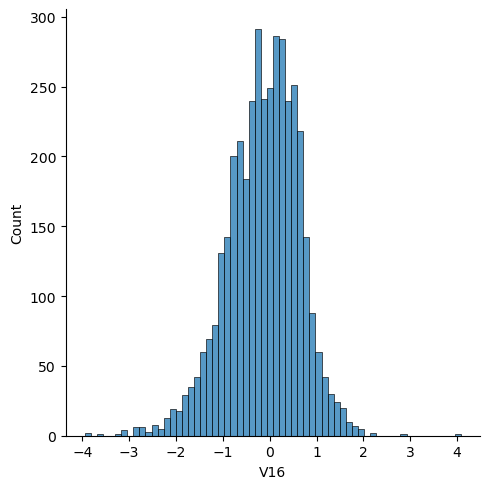

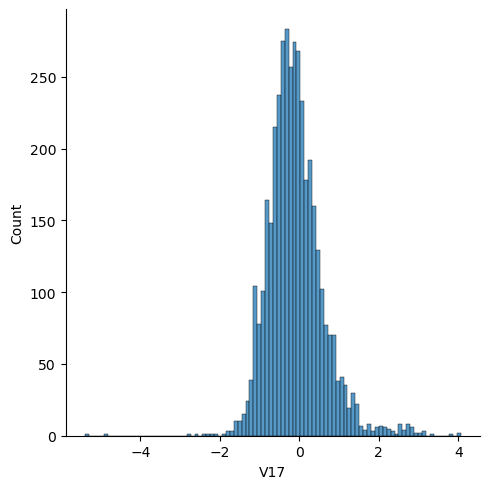

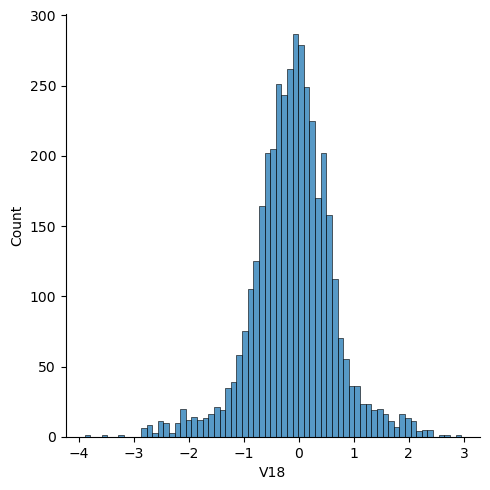

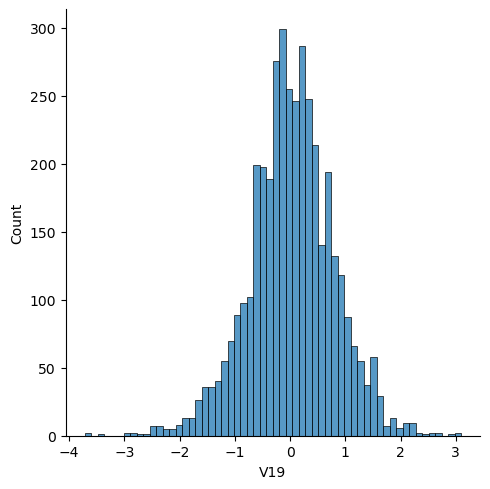

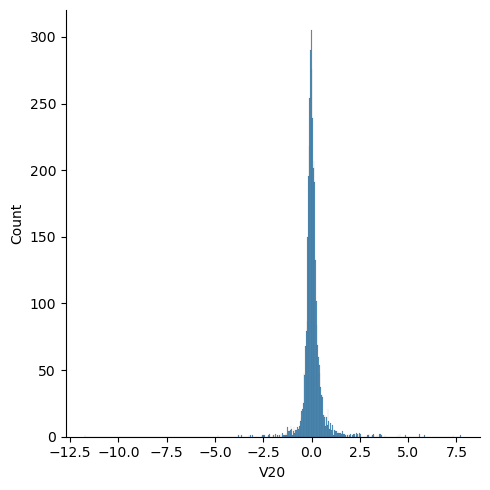

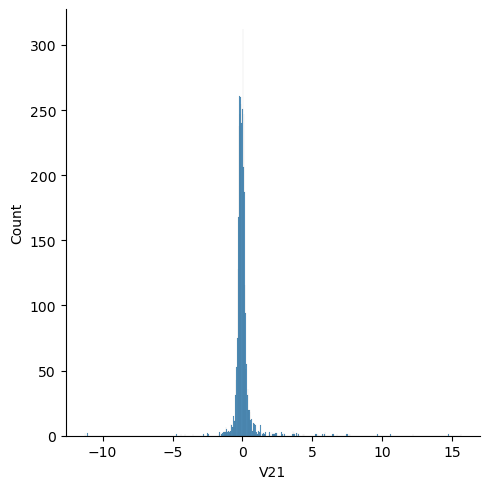

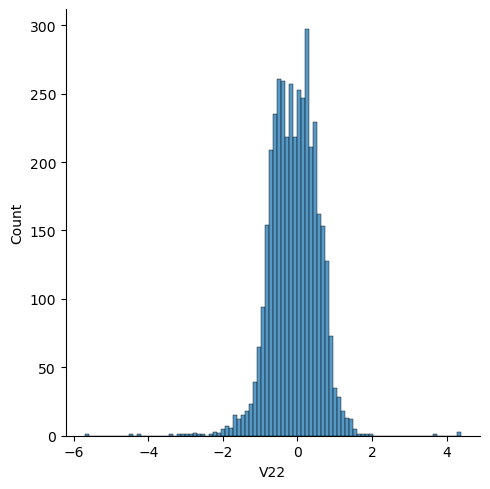

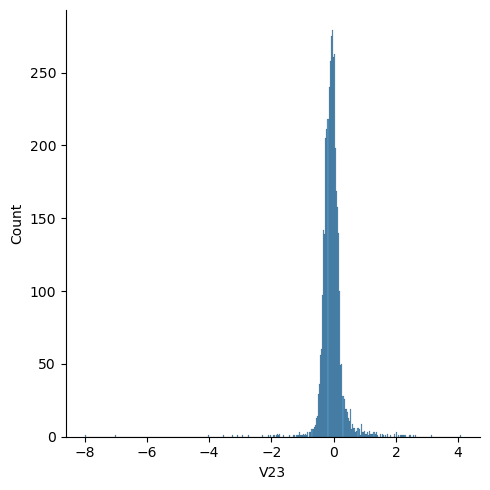

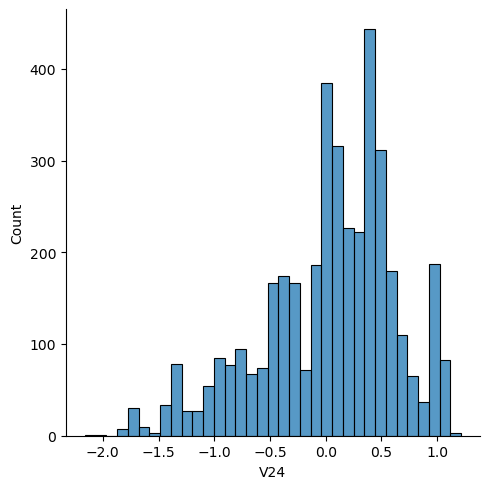

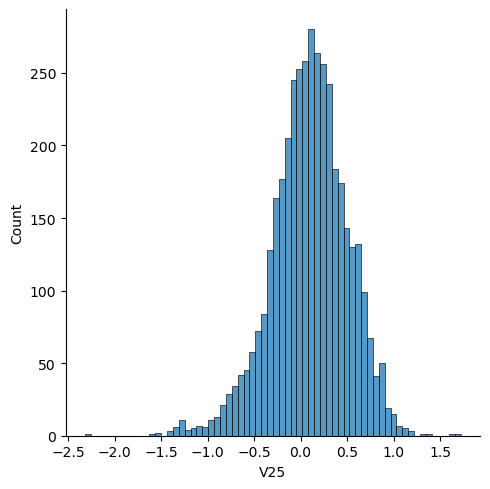

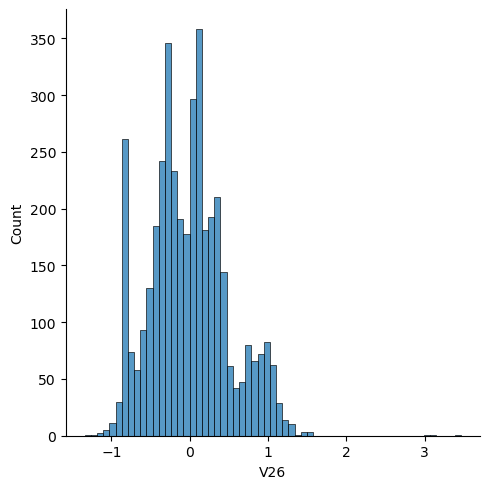

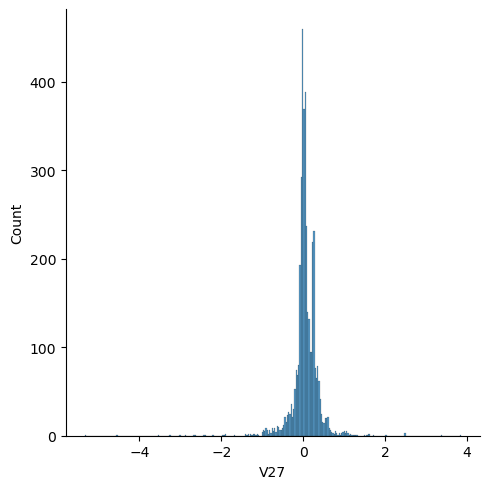

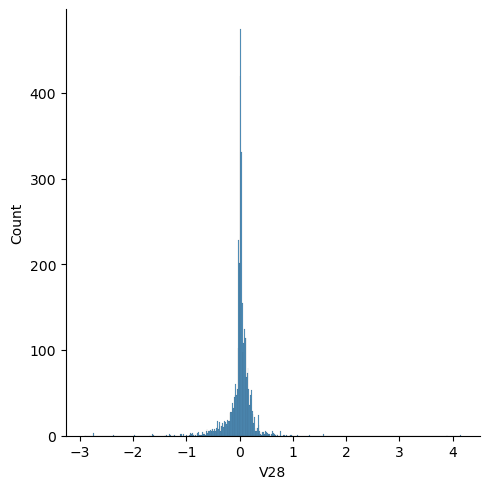

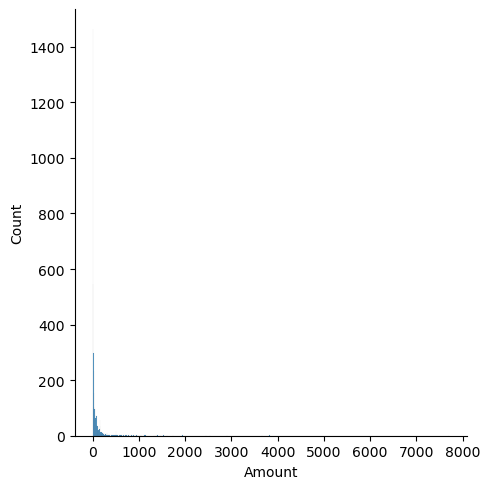

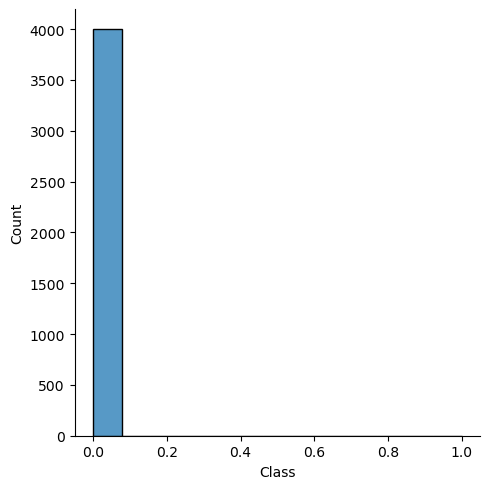

In [18]:
#creating for loop to get the distributon plot for all columns
for columns in fp:
    sns.displot(x=columns,data=fp.iloc[0:4000,0:32])

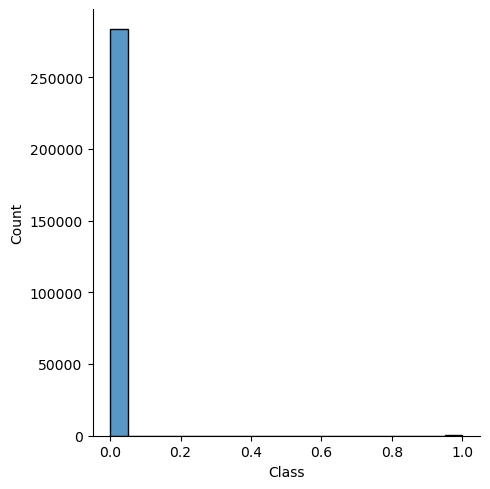

In [19]:

sns.displot(x=fp['Class'],data=fp)

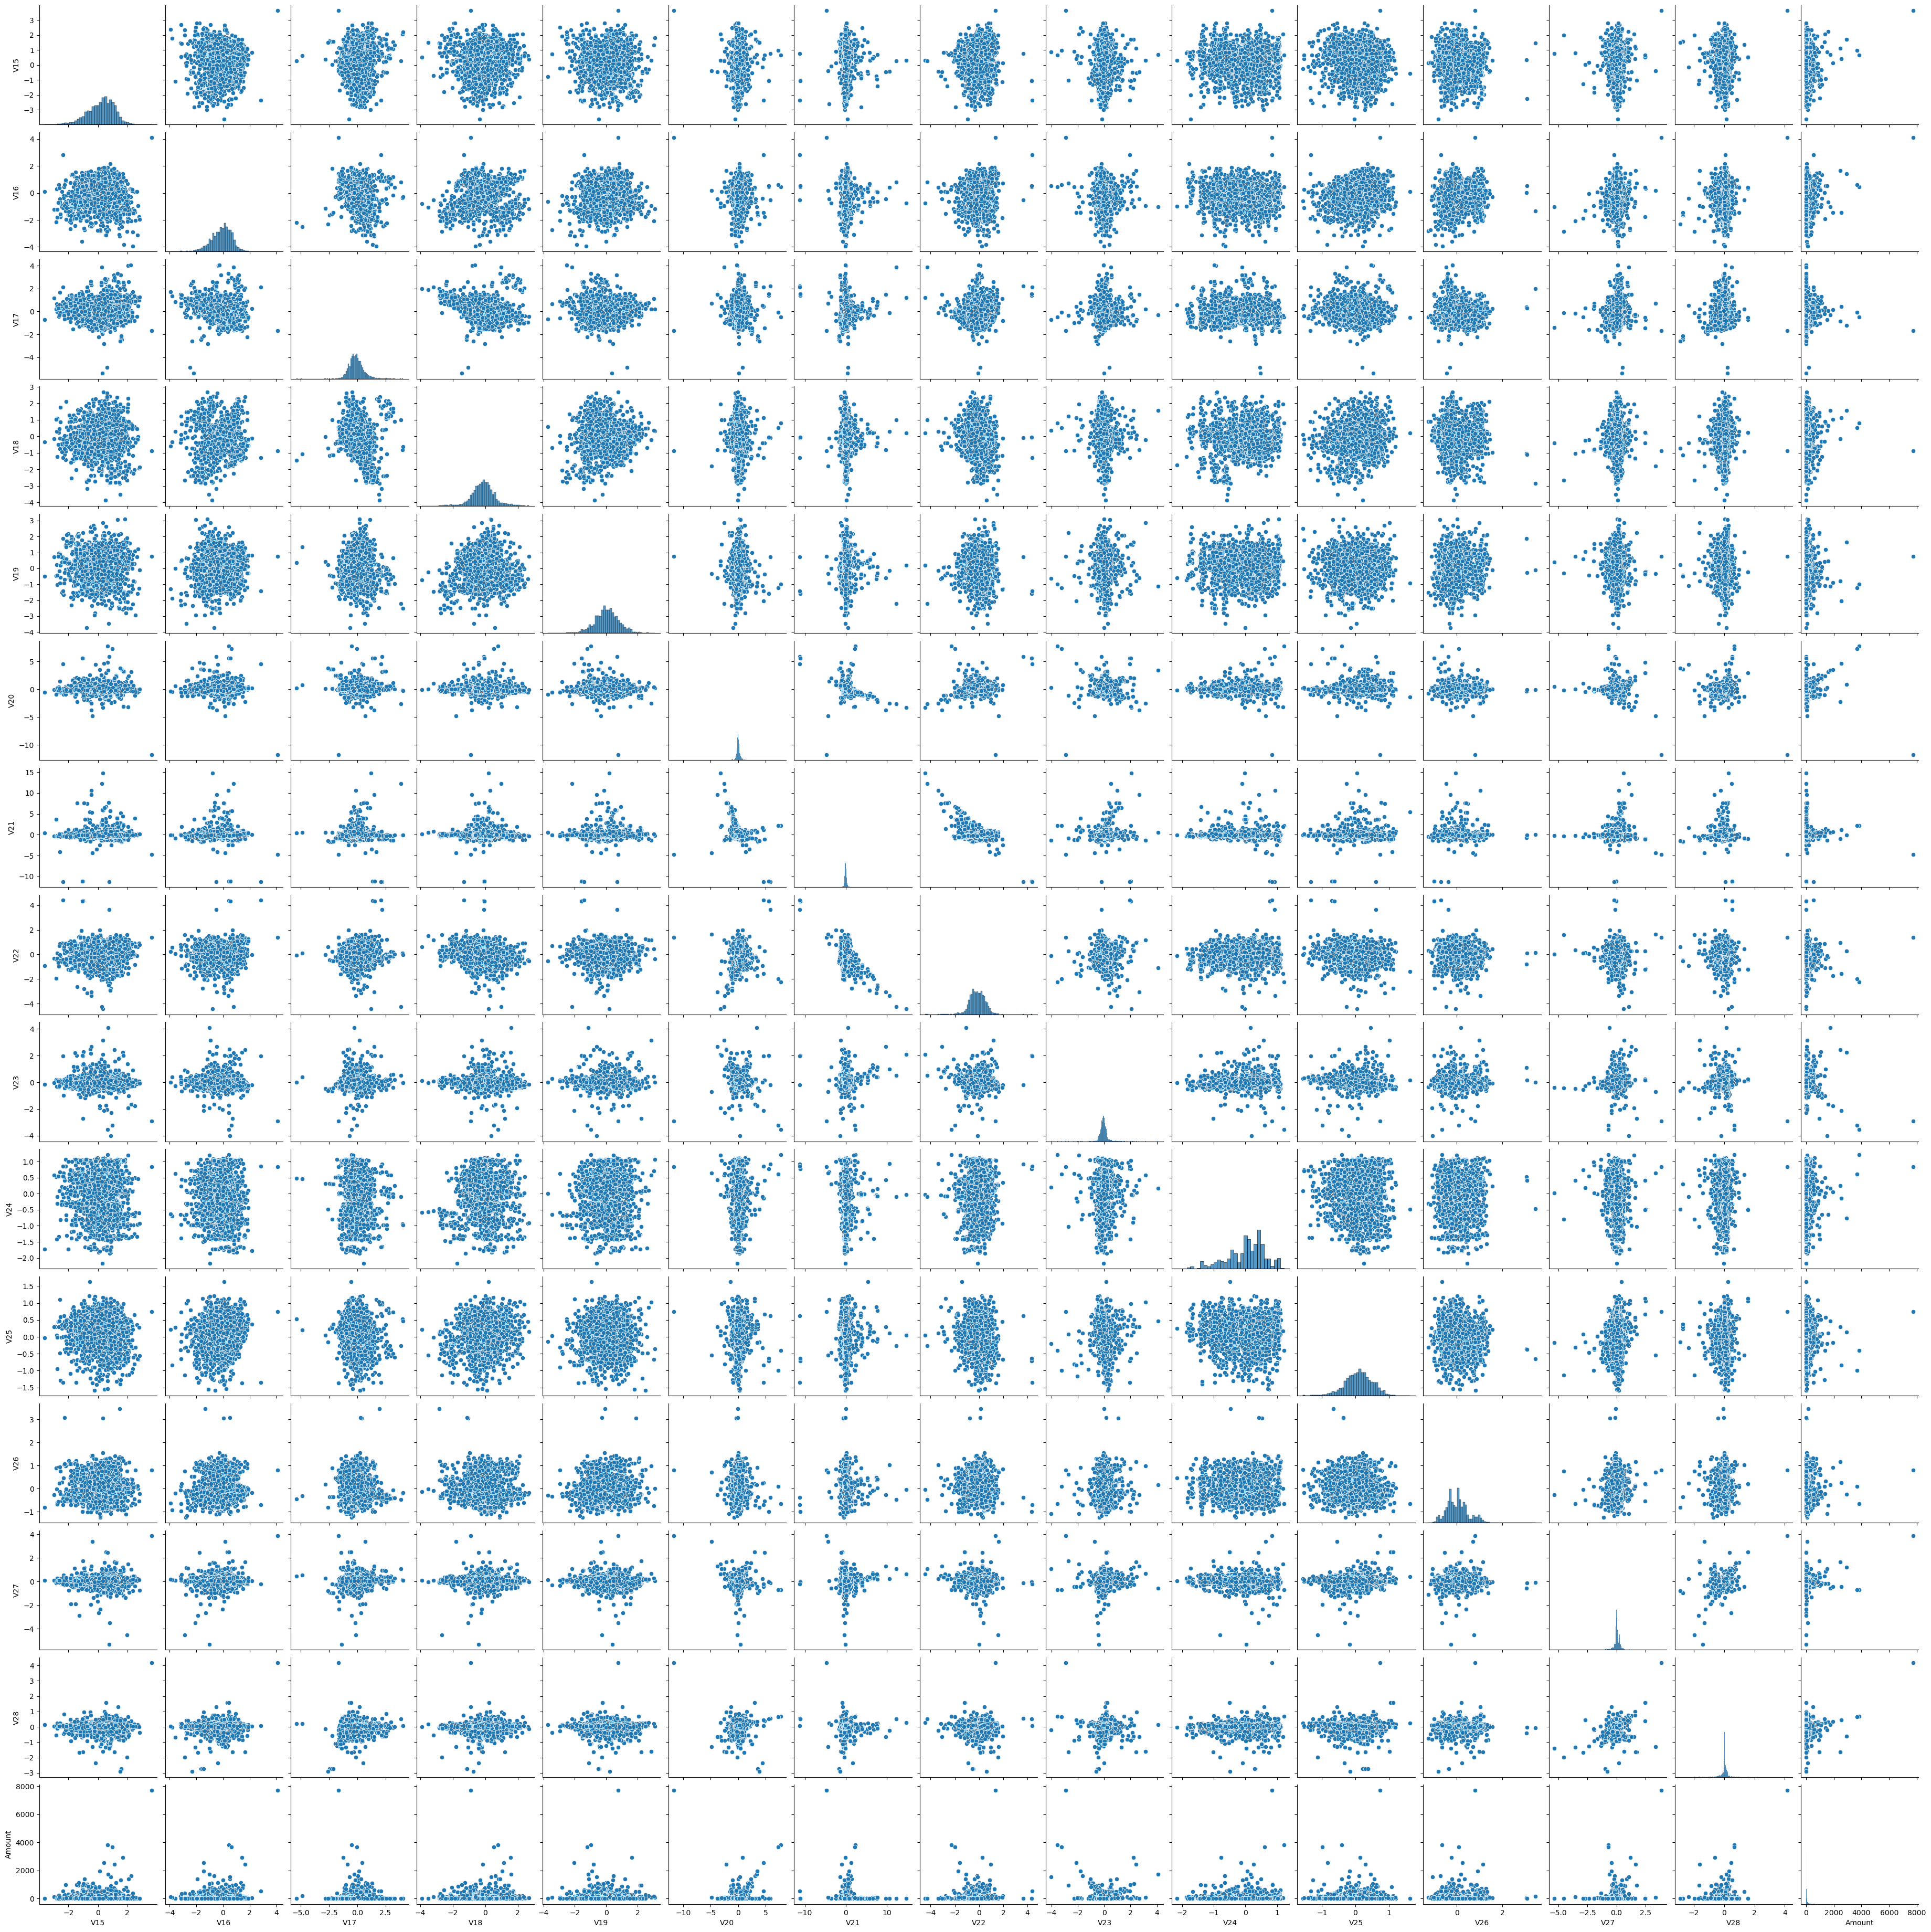

In [20]:
sns.pairplot(fp.iloc[0:3000,15:30])#it is used to see wheteher the variable is continous or discrete
#if the dataset is show high then pairplot become slow .so,at that time we doing random samplig

In [21]:
plt.show()

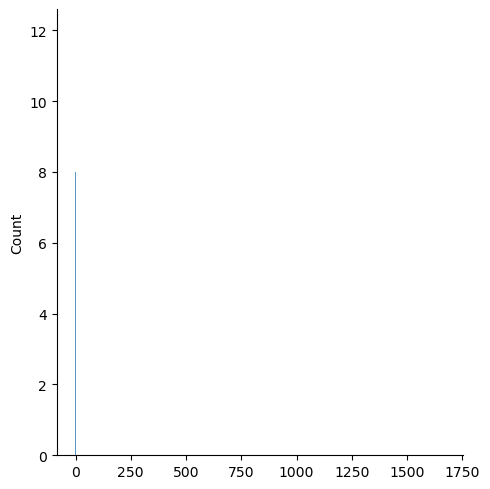

In [22]:
sns.displot(x=fp.iloc[0:4000,0:30].mean())

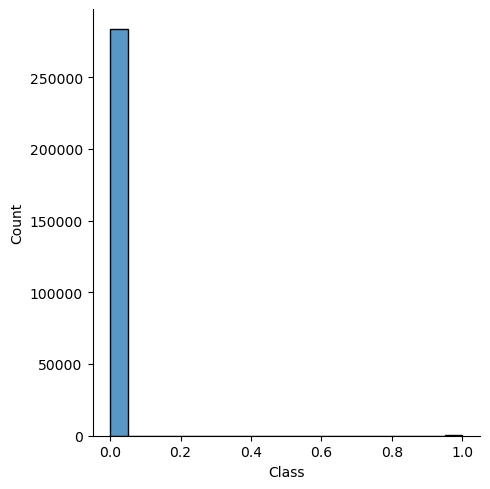

In [23]:
sns.displot(fp['Class'])

<AxesSubplot:xlabel='Class', ylabel='count'>

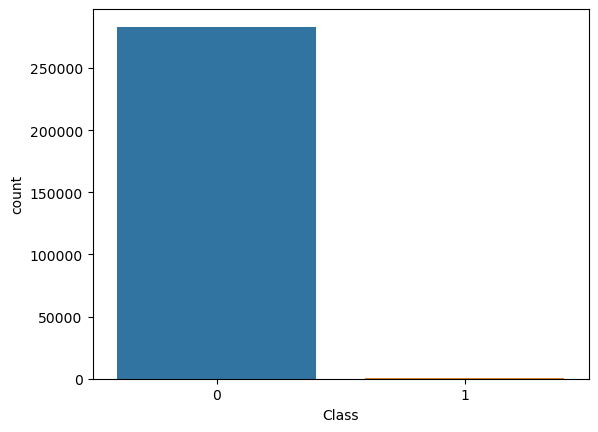

In [24]:
sns.countplot(x="Class",data=fp)#the value of 1 is so low ,thus we have to reduce the value of zero

<AxesSubplot:>

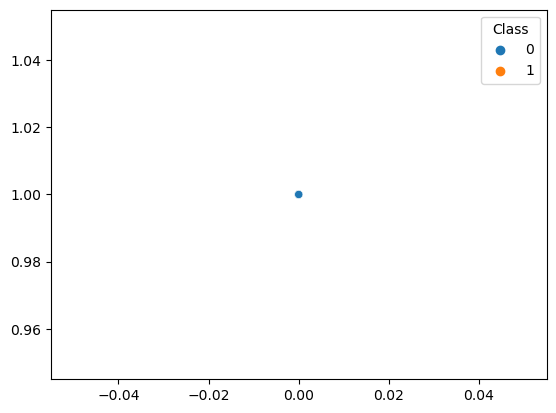

In [25]:
sns.scatterplot(x=0,y=1,hue='Class',data=fp)

In [26]:
#The problem is that the data in class columns are highly imbalanced means so we have to perform sampling technique to balanced it


In [27]:
correlation=fp.corr()


<AxesSubplot:>

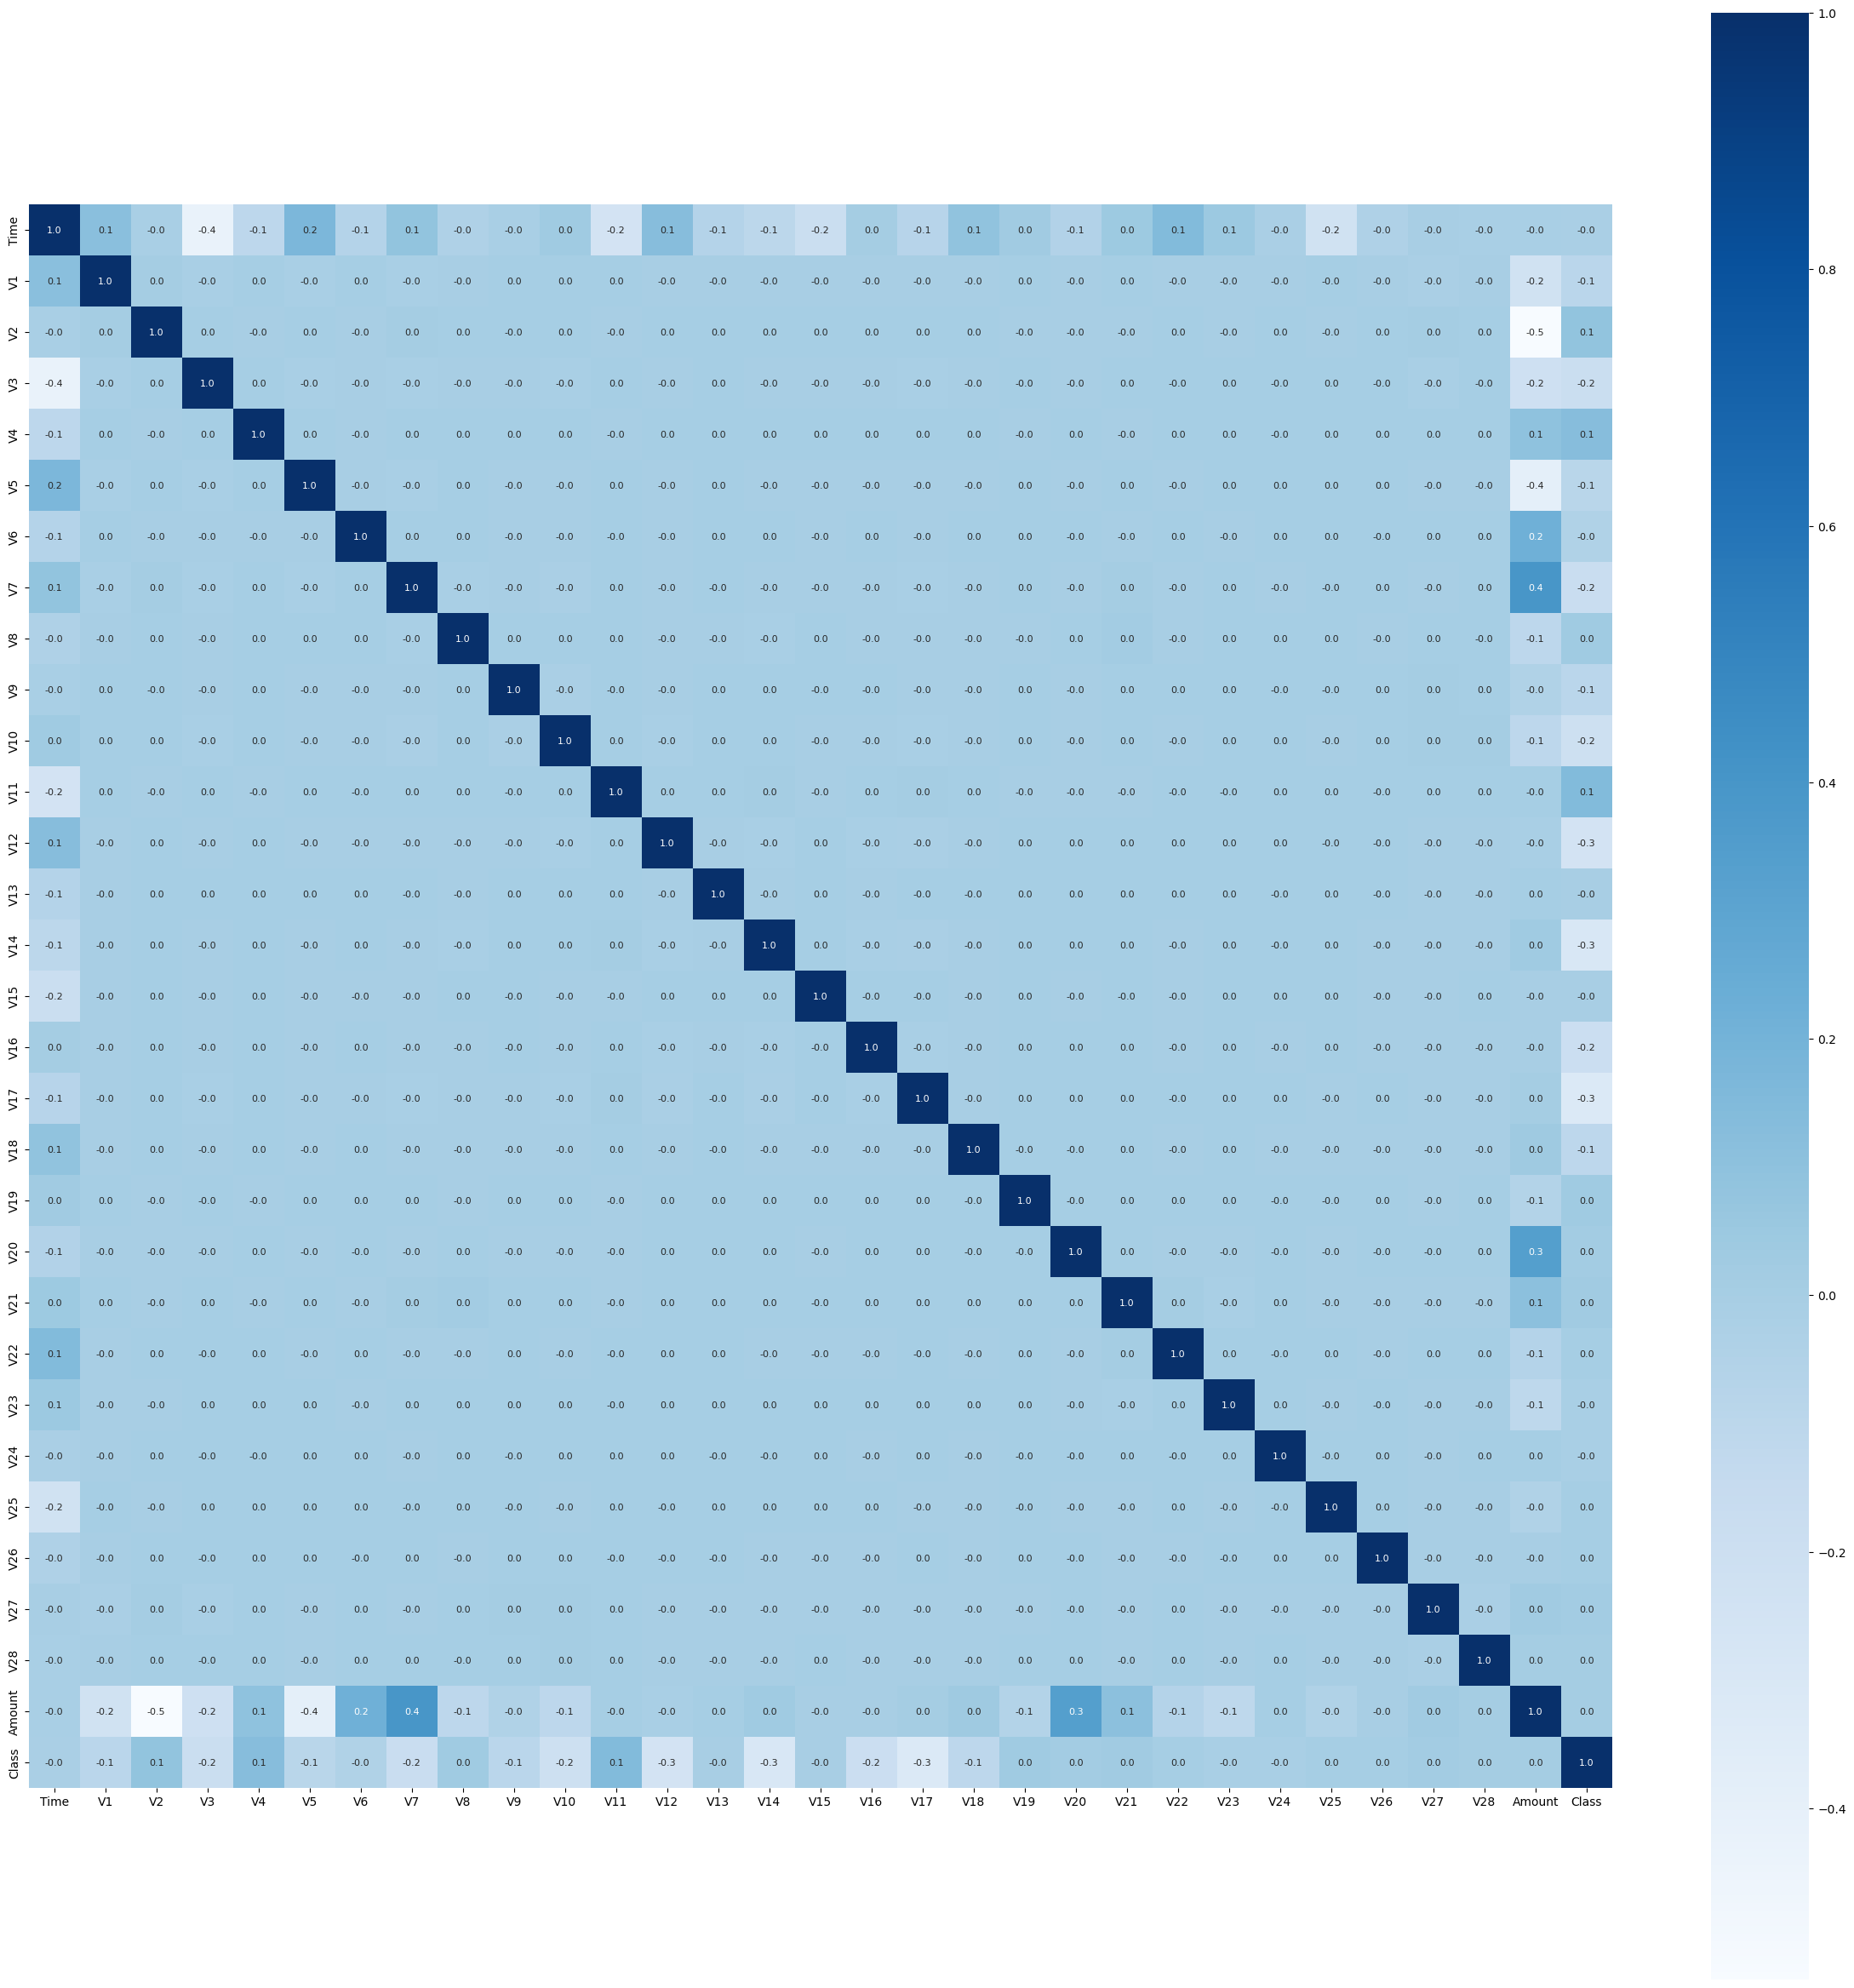

In [28]:
plt.figure(figsize=(30,30))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f', annot=True,annot_kws={'size':8},cmap='Blues')

In [29]:
#The problem is that the data in class columns are highly imbalanced means so we have to perform sampling technique to balanced it
#0->legal Transactions
#1->fraudalent Transactions
legal=fp[fp.Class ==0]
fraud=fp[fp.Class==1]

In [30]:
legal.shape

(283253, 31)

In [31]:
fraud.shape

(473, 31)

In [32]:
#under sampling :building a sample dataset that contains similar  distribution of legal and fraud transactions
legal_sample=legal.sample(n=473)

In [33]:
legal_sample.shape

(473, 31)

In [34]:
#now both are equal
newdata=pd.concat([legal_sample,fraud],axis=0)

newdata.head()

In [35]:
newdata.head()

Time        V1        V2        V3        V4        V5        V6  \
209490  137584.0 -2.534705  2.698316 -3.537048 -2.653447  2.829541  2.571155   
64826    51323.0  1.139124  0.094173  1.459257  1.404458 -1.015609 -0.363077   
181195  124870.0  2.034625  0.213336 -2.556142  0.390142  0.916387 -0.997230   
10700    18105.0 -1.840995  1.327587  1.857996 -0.987325 -0.497287  1.305313   
210336  137936.0  2.097349  0.624825 -3.362832  0.500836  1.500388 -1.080975   

              V7        V8        V9  ...       V21       V22       V23  \
209490  0.693153  1.119877  1.116950  ... -0.046222  0.631324 -0.071353   
64826  -0.462469 -0.010381  0.656926  ... -0.027283  0.205468  0.022540   
181195  0.605857 -0.282584 -0.102075  ...  0.086721  0.348942 -0.026830   
10700  -1.055419 -2.913871  2.111365  ...  2.970693 -1.003293 -0.185336   
210336  0.700441 -0.300293 -0.175675  ... -0.049416  0.021215 -0.107095   

             V24       V25       V26       V27       V28  Amount  Class  
209490  0.717142  0.188157  0.097628  0.771555  0.267591    7.63      0  
64826   0.747712  0.420181 -0.433137  0.083017  0.043785    4.99      0  
181195  0.666799  0.328470  0.663423 -0.108803 -0.058187   17.95      0  
10700  -0.824187  0.187017  1.092027  0.031987  0.042764   71.25      0  
210336  0.105217  0.423716  0.689387 -0.087267 -0.027890    0.76      0  

[5 rows x 31 columns]

In [36]:
newdata.tail()

Time        V1        V2        V3        V4        V5        V6  \
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  ...       V21       V22       V23  \
279863 -0.882850  0.697211 -2.064945  ...  0.778584 -0.319189  0.639419   
280143 -1.413170  0.248525 -1.127396  ...  0.370612  0.028234 -0.145640   
280149 -2.234739  1.210158 -0.652250  ...  0.751826  0.834108  0.190944   
281144 -2.208002  1.058733 -1.632333  ...  0.583276 -0.269209 -0.456108   
281674  0.223050 -0.068384  0.577829  ... -0.164350 -0.295135 -0.072173   

             V24       V25       V26       V27       V28  Amount  Class  
279863 -0.294885  0.537503  0.788395  0.292680  0.147968  390.00      1  
280143 -0.081049  0.521875  0.739467  0.389152  0.186637    0.76      1  
280149  0.032070 -0.739695  0.471111  0.385107  0.194361   77.89      1  
281144 -0.183659 -0.328168  0.606116  0.884876 -0.253700  245.00      1  
281674 -0.450261  0.313267 -0.289617  0.002988 -0.015309   42.53      1  

[5 rows x 31 columns]

In [37]:
newdata.groupby('Class').count()

Time   V1   V2   V3   V4   V5   V6   V7   V8   V9  ...  V20  V21  V22  \
Class                                                     ...                  
0       473  473  473  473  473  473  473  473  473  473  ...  473  473  473   
1       473  473  473  473  473  473  473  473  473  473  ...  473  473  473   

       V23  V24  V25  V26  V27  V28  Amount  
Class                                        
0      473  473  473  473  473  473     473  
1      473  473  473  473  473  473     473  

[2 rows x 30 columns]

In [38]:
newdata['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

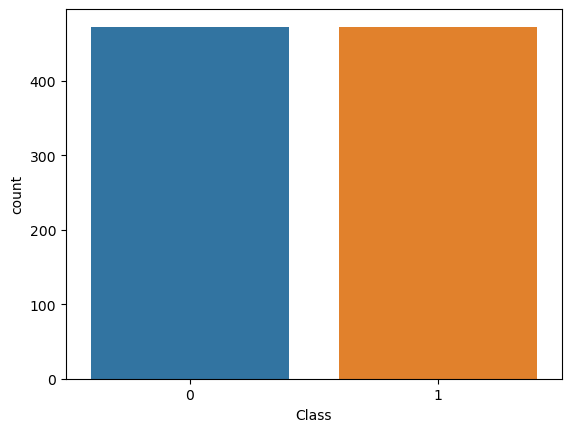

In [39]:
sns.countplot(x="Class",data=newdata)

In [40]:
correlation=newdata.corr()


<AxesSubplot:>

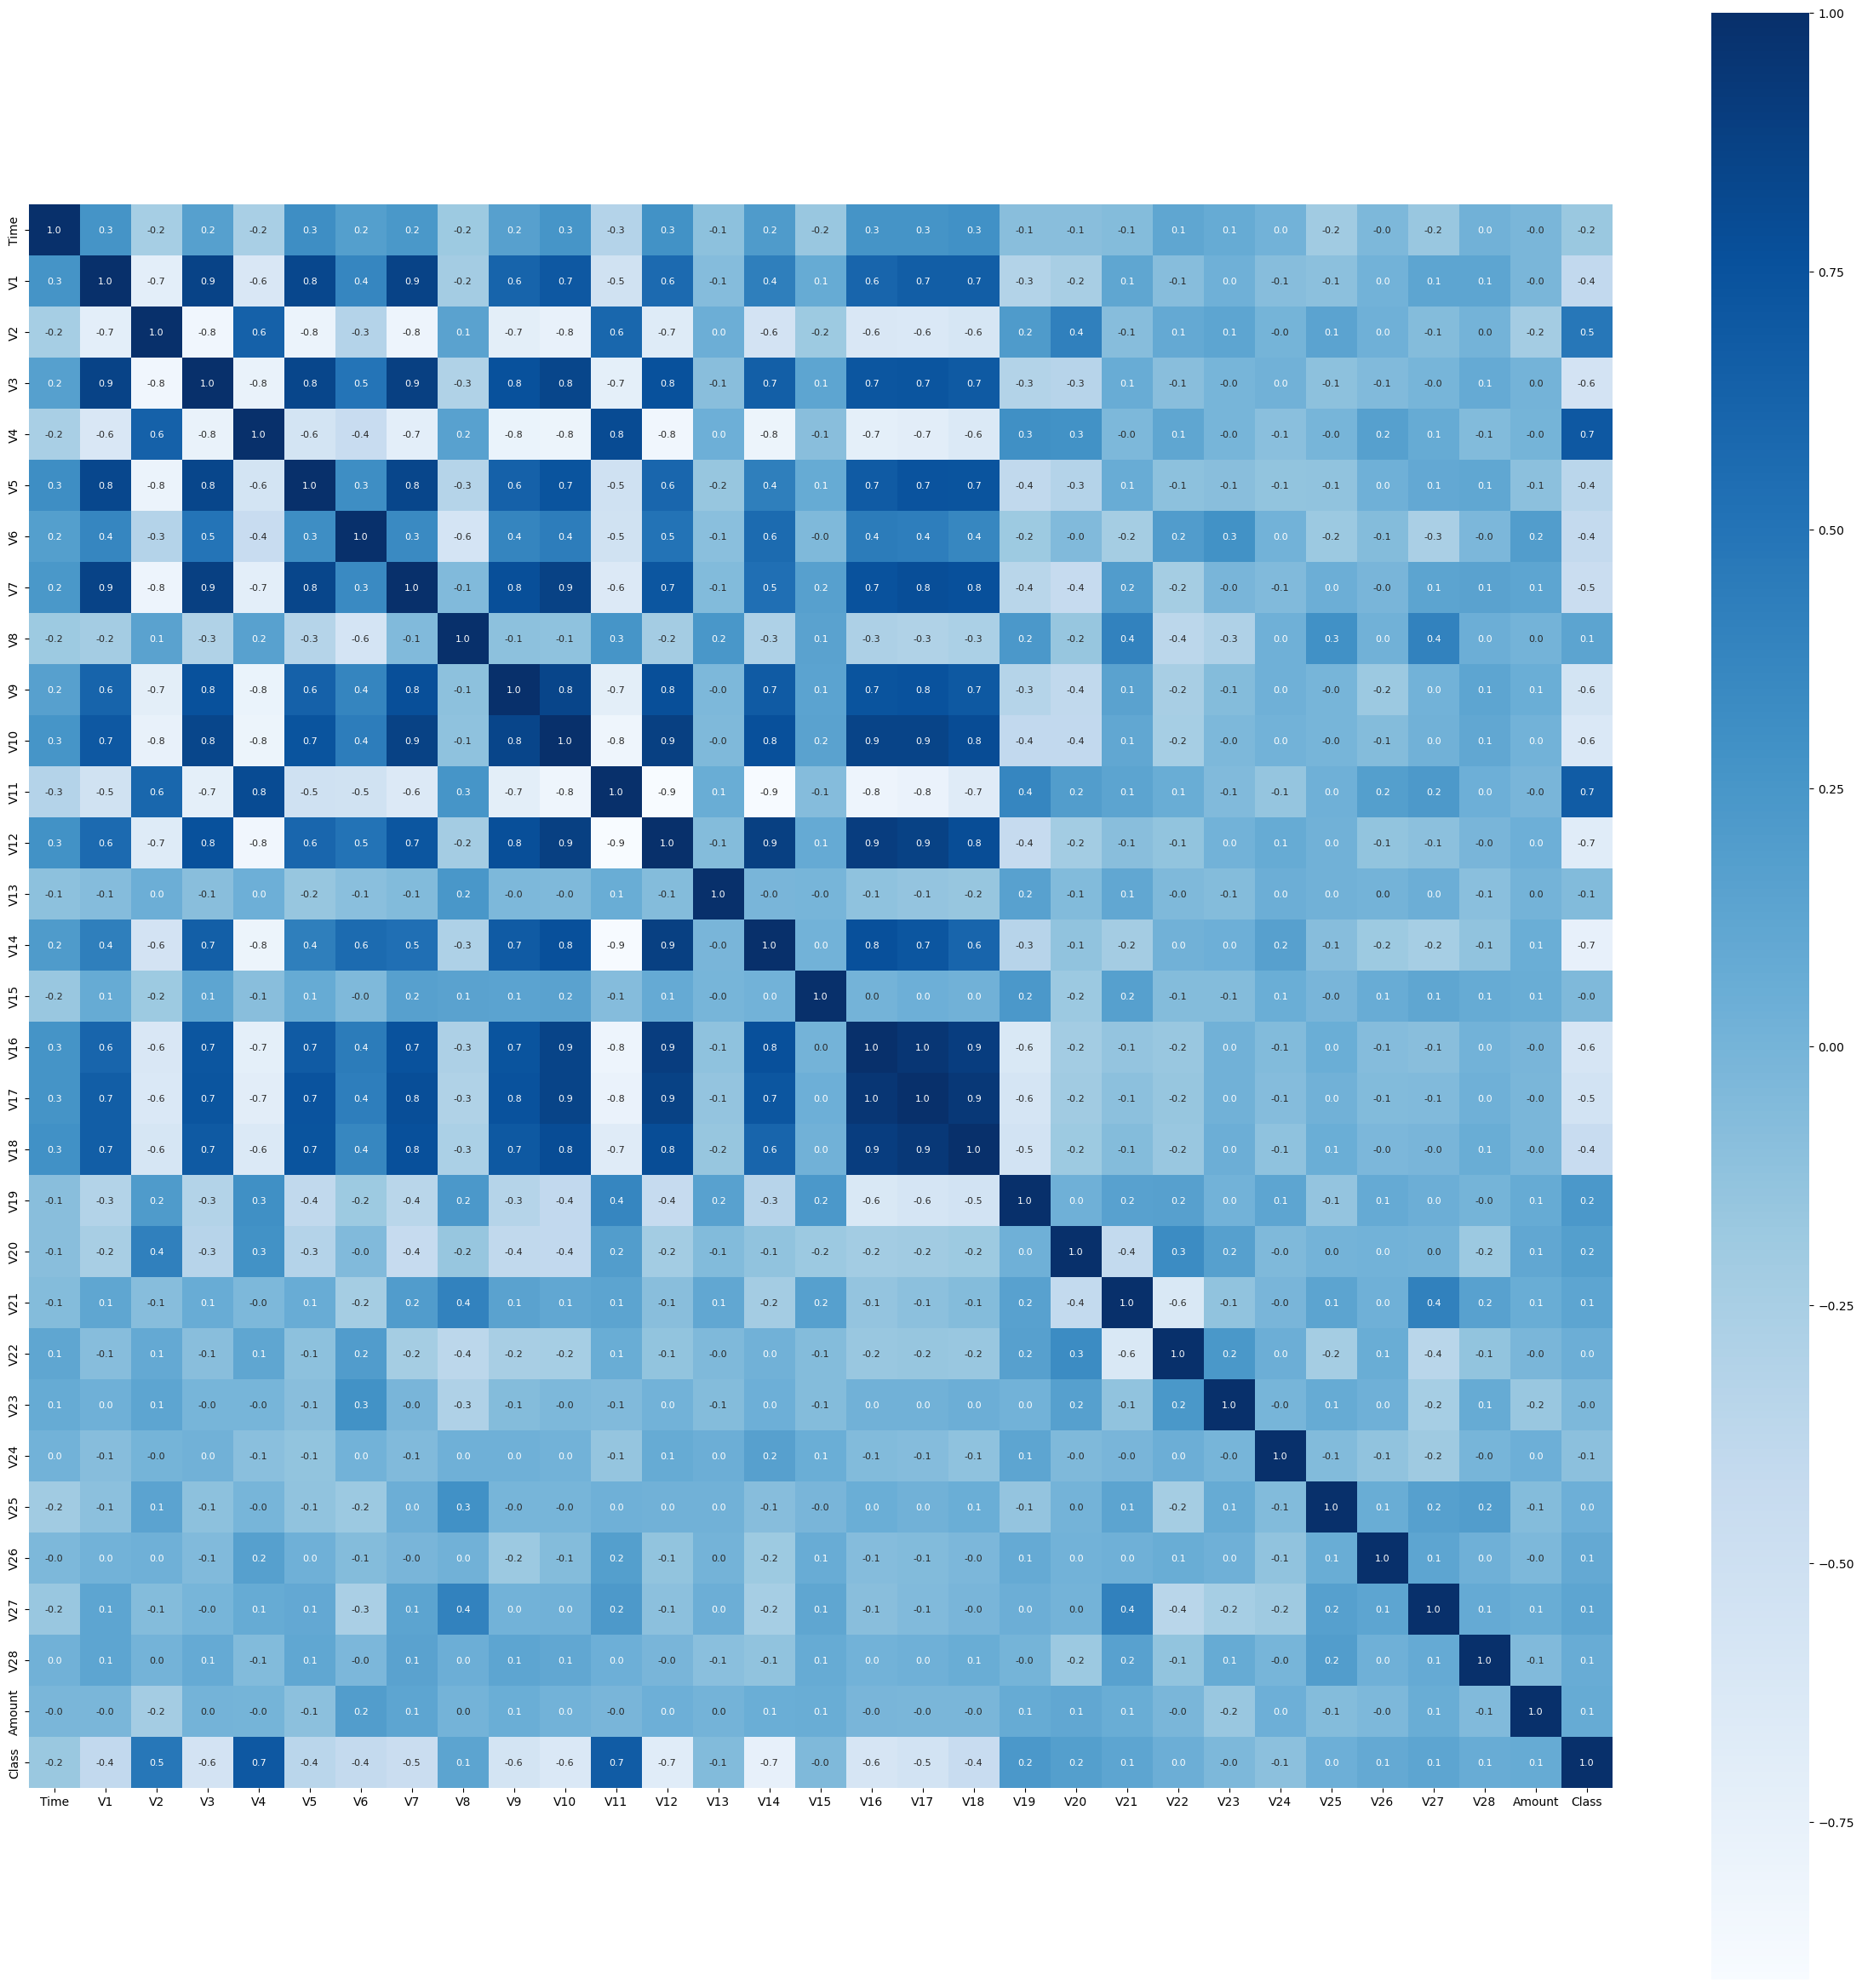

In [41]:
plt.figure(figsize=(30,30))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f', annot=True,annot_kws={'size':8},cmap='Blues')

<AxesSubplot:>

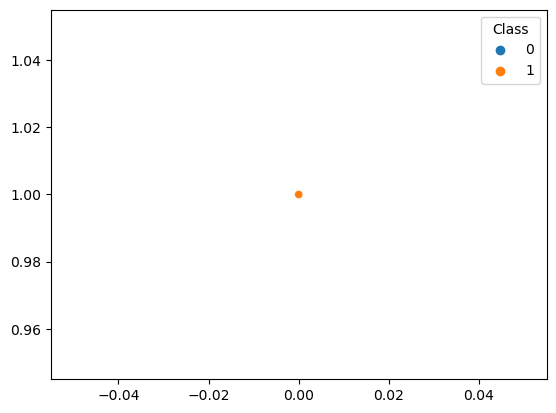

In [42]:
sns.scatterplot(x=0,y=1,hue='Class',data=newdata)

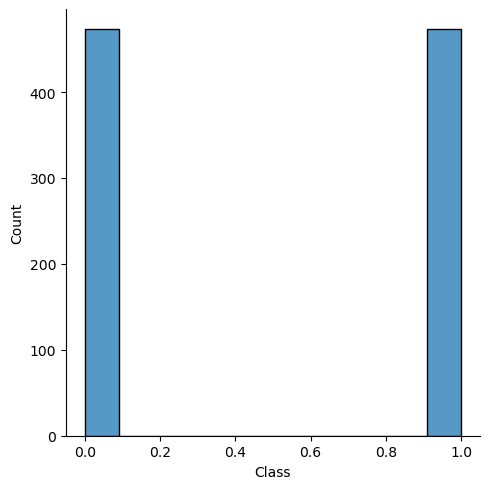

In [43]:
sns.displot(newdata['Class'])

In [44]:
#sns.displot(x=newdata.mean())

In [45]:
#sns.pairplot(newdata)

In [46]:
'''for columns in newdata:
    sns.displot(x=columns,data=newdata)'''

'for columns in newdata:\n    sns.displot(x=columns,data=newdata)'

In [47]:
'''# Plotting the histogram.
plt.hist(newdata, bins=5, density=True, alpha=0.4)
  
plt.show()'''

'# Plotting the histogram.\nplt.hist(newdata, bins=5, density=True, alpha=0.4)\n  \nplt.show()'

In [49]:
#Divide the dataset into training and testing set
X=newdata.drop(columns='Class',axis=1)
Y=newdata['Class']

In [51]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
209490  137584.0 -2.534705  2.698316 -3.537048 -2.653447  2.829541  2.571155   
64826    51323.0  1.139124  0.094173  1.459257  1.404458 -1.015609 -0.363077   
181195  124870.0  2.034625  0.213336 -2.556142  0.390142  0.916387 -0.997230   
10700    18105.0 -1.840995  1.327587  1.857996 -0.987325 -0.497287  1.305313   
210336  137936.0  2.097349  0.624825 -3.362832  0.500836  1.500388 -1.080975   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [52]:
print(Y)

209490    0
64826     0
181195    0
10700     0
210336    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 946, dtype: int64


In [53]:
newdata.shape

(946, 31)

In [54]:
#standardization and normalization of training data
scaler=StandardScaler()

In [55]:
scaler.fit_transform(X)

array([[ 0.99716667, -0.03926857,  0.28130979, ...,  0.71152316,
         0.44775913, -0.45647439],
       [-0.76383268,  0.63864344, -0.42467875, ..., -0.01194307,
        -0.00195984, -0.46859814],
       [ 0.73761315,  0.80388538, -0.39237326, ..., -0.21349316,
        -0.20686418, -0.40908154],
       ...,
       [ 1.64568299,  0.30368195, -0.14484902, ...,  0.3054718 ,
         0.30061105, -0.13381726],
       [ 1.65823808, -0.14613176, -0.29138018, ...,  0.83059159,
        -0.59973063,  0.63360708],
       [ 1.66603653,  0.79601565, -0.40724601, ..., -0.09603183,
        -0.12070338, -0.29620206]])

In [56]:
X=scaler.fit_transform(X)

In [57]:
X

array([[ 0.99716667, -0.03926857,  0.28130979, ...,  0.71152316,
         0.44775913, -0.45647439],
       [-0.76383268,  0.63864344, -0.42467875, ..., -0.01194307,
        -0.00195984, -0.46859814],
       [ 0.73761315,  0.80388538, -0.39237326, ..., -0.21349316,
        -0.20686418, -0.40908154],
       ...,
       [ 1.64568299,  0.30368195, -0.14484902, ...,  0.3054718 ,
         0.30061105, -0.13381726],
       [ 1.65823808, -0.14613176, -0.29138018, ...,  0.83059159,
        -0.59973063,  0.63360708],
       [ 1.66603653,  0.79601565, -0.40724601, ..., -0.09603183,
        -0.12070338, -0.29620206]])

In [58]:
#minmax scaler for further normalization
#scale the feature from MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scalers=MinMaxScaler()
X=scalers.fit_transform(X)

In [59]:
X

array([[0.80115185, 0.85094504, 0.58057889, ..., 0.77890291, 0.45377852,
        0.00358912],
       [0.29882835, 0.96252555, 0.5241602 , ..., 0.71215713, 0.43333437,
        0.00234727],
       [0.72711444, 0.98972344, 0.52674187, ..., 0.69356245, 0.42401945,
        0.0084436 ],
       ...,
       [0.98614055, 0.90739277, 0.54652264, ..., 0.74144129, 0.44708919,
        0.03663912],
       [0.98972188, 0.83335596, 0.53481268, ..., 0.78988796, 0.4061598 ,
        0.11524693],
       [0.99194638, 0.98842813, 0.52555332, ..., 0.70439924, 0.4279363 ,
        0.02000593]])

In [60]:
#Cross validation Phase:it is phaSE IN which we preserve some data for testing
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.24,stratify=Y,random_state=72)

In [61]:
print(X.shape,X_train.shape,X_test.shape)

(946, 30) (718, 30) (228, 30)


In [62]:
print(X_train)
print(Y_train)#ytrain is realoutput

[[2.59282337e-01 9.20793393e-01 5.29819953e-01 ... 7.16050942e-01
  4.32950326e-01 4.70395650e-04]
 [6.98469637e-01 8.51095762e-01 5.00718933e-01 ... 7.26339188e-01
  4.26650575e-01 5.27548721e-02]
 [8.23705481e-02 7.84861518e-01 7.09223280e-01 ... 8.59788434e-01
  4.95255176e-01 4.70395650e-04]
 ...
 [7.78714682e-01 9.63664748e-01 5.90189512e-01 ... 7.51440504e-01
  4.59102336e-01 0.00000000e+00]
 [8.96019194e-01 9.09289387e-01 6.02253744e-01 ... 7.51455218e-01
  4.56039754e-01 0.00000000e+00]
 [4.47741725e-01 6.01101817e-01 7.30294722e-01 ... 6.27649996e-01
  2.50050688e-01 4.18652128e-04]]
50537     1
169963    0
9509      1
203328    1
6609      1
         ..
251477    1
211836    0
201098    1
248296    1
123362    0
Name: Class, Length: 718, dtype: int64


In [63]:
#USE DIFFERENT DIFFERNT MODEL TO CHECK THE ACCURACY(TRAINING AND TESTING ACCURACY).
#I WILL USE ONLY THOSE MODEL FOR FURTHER STEP(TRAINING STAGE)WHICH GIVE PROPER VALUE OF ACCURACY
#BECAUSE THE MODEL WHICH GIVE PROPER ACCURACY CAN PREDICT THE RESULT IN BETTER WAY
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
results=[]
names=[]
# create instances of all models
models = {
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
    
}

from sklearn.metrics import accuracy_score
print("TRAINING ACCURACY:")
for name, model in models.items():
    model.fit(X_train, Y_train)
    X_train_prediction = model.predict(X_train)
    trainacc = accuracy_score( X_train_prediction, Y_train)
    print(f'{name}:\ntrainAccuracy: {trainacc:.4f}')
#for testing  data  
print("TESTING ACCURACY:")
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    testacc = accuracy_score(Y_test, y_pred)
    print(f'{name}:\ntestingAccuracy: {testacc:.4f}') 

TRAINING ACCURACY:
Linear Discriminant Analysis:
trainAccuracy: 0.9053
Logistic Regression:
trainAccuracy: 0.9220
Naive Bayes:
trainAccuracy: 0.8942
Support Vector Machine:
trainAccuracy: 0.9345
K-Nearest Neighbors:
trainAccuracy: 0.9373
Decision Tree:
trainAccuracy: 1.0000


/Users/pritikumari/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Random Forest:
trainAccuracy: 1.0000
Bagging:
trainAccuracy: 0.9889
AdaBoost:
trainAccuracy: 0.9930
Gradient Boosting:
trainAccuracy: 1.0000
Extra Trees:
trainAccuracy: 1.0000
TESTING ACCURACY:
Linear Discriminant Analysis:
testingAccuracy: 0.9079
Logistic Regression:
testingAccuracy: 0.9474
Naive Bayes:
testingAccuracy: 0.9342
Support Vector Machine:
testingAccuracy: 0.9474
K-Nearest Neighbors:
testingAccuracy: 0.9430
Decision Tree:
testingAccuracy: 0.9211


/Users/pritikumari/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Random Forest:
testingAccuracy: 0.9649
Bagging:
testingAccuracy: 0.9561
AdaBoost:
testingAccuracy: 0.9254
Gradient Boosting:
testingAccuracy: 0.9605
Extra Trees:
testingAccuracy: 0.9123


In [64]:
#random Forest has good both training and testing accuracy
model = RandomForestClassifier()

In [65]:
model.fit(X_train,Y_train)

RandomForestClassifier()

In [66]:
mds=model.fit(X_train,Y_train)

In [68]:
# again i will find both traning and testing accuracy for drawing confusion matrix
X_train_prediction=mds.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [69]:
print(X_train_prediction)

[1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0
 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0
 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0
 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0
 1 1 0 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 1 1 1 0 0 1 1 0
 1 1 0 1 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1
 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1
 0 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0
 1 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0
 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1
 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0
 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0
 0 1 0 0 1 0 1 0 1 1 0 0 

In [70]:
print(training_data_accuracy)

1.0


In [71]:
# accuracy on test data
X_test_prediction=mds.predict(X_test).round()#that is Ypred also
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [72]:
print(test_data_accuracy)

0.956140350877193


<AxesSubplot:>

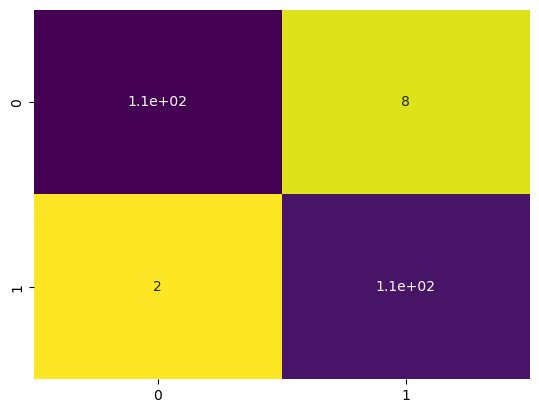

In [74]:
#confusion matrix for that
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(X_test_prediction,Y_test) 
sns.heatmap(cm, annot=True, cbar=False, cmap="viridis_r",
            yticklabels=mds.classes_, xticklabels=mds.classes_)

In [75]:
from sklearn import metrics
# Print the confusion matrix

metrics.confusion_matrix(Y_test, X_test_prediction)

array([[112,   2],
       [  8, 106]])

In [76]:
# Print the precision and recall, among other metrics
print(metrics.classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       114
           1       0.98      0.93      0.95       114

    accuracy                           0.96       228
   macro avg       0.96      0.96      0.96       228
weighted avg       0.96      0.96      0.96       228



/Users/pritikumari/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/pritikumari/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Random Forest classification')

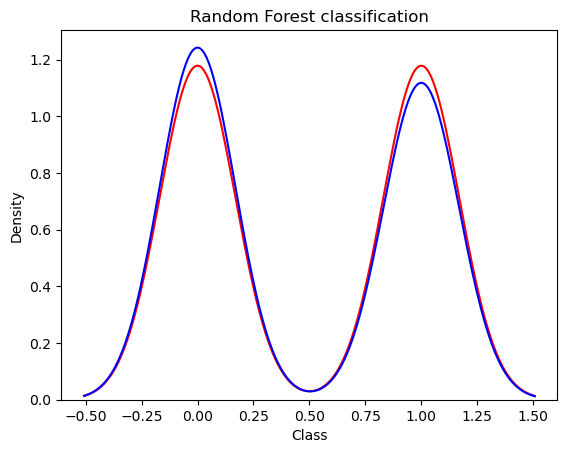

In [77]:
ax=sns.distplot(Y_test,hist=False,color="r",label="Actual value")
sns.distplot(X_test_prediction,hist=False,color="b",label="Predicted value",ax=ax)
plt.title('Random Forest classification')

In [78]:
# making a predictive System for testing the data 
# making a predictive System
input_data=(2,-1.158233093,0.877736755,1.548717847,0.403033934,-0.407193377,0.095921462,0.592940745,-0.270532677,0.817739308,0.753074432,-0.822842878,0.53819555,1.345851593,-1.119669835,0.17512113,-0.451449183,-0.237033239,-0.038194787,0.803486925,0.40854236,-0.009430697,0.798278495,-0.13745808,0.141266984,-0.206009588,0.502292224,0.21942223,0.215153147,69.99)
#changing the input data to a numpy arrary
input_data_as_numpy_array=np.asarray(input_data)
#reshape the np array s we are predictive for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
#as i already standarize the data so here for input value we once standarize this
std_data=scalers.transform(input_data_reshaped)
print(std_data)
std_data=scaler.transform(std_data)
print(std_data)
prediction=mds.predict(std_data)#model=Randomforest classification
print("target:",prediction)
if(prediction==0):
    print("legal transaction")
elif(prediction==1):
    print("transaction Is not legal")

[[1.08720916 0.66676977 0.62824202 1.07257604 0.46988694 0.57037101
  0.45233377 0.89552733 0.66041155 0.73449924 0.77062963 0.14505509
  0.8253403  0.70095796 0.4621391  0.62708352 0.61114787 0.64338384
  0.62645451 0.56962859 0.59161309 0.45982892 0.56240553 0.77039615
  0.62649729 0.66573603 0.37643498 0.7335025  0.44320429 7.21947129]]
[[-1.81155825  0.55148241 -0.27989146  0.74630264 -0.55331098  0.50147204
   0.71868289  0.6380146   0.06208755  0.86337141  0.7972804  -0.61657098
   0.84267973  0.70567655  0.84842989  0.65874293  0.77717521  0.6536444
   0.7136783   0.15390071  0.33768259  0.12061608  0.53875648  0.71950189
   1.27745108  0.94632632  0.76340532  0.67153986  0.80063929 -0.45835967]]
target: [0]
legal transaction


/Users/pritikumari/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
